In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [33]:
dataset = pd.read_csv('housing_price_dataset.csv')
dataset.head()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
0,2126,4,1,1969,215355.2836
1,2459,3,2,1980,195014.2216
2,1860,2,1,1970,306891.0121
3,2294,2,1,1996,206786.7872
4,2130,5,2,2001,272436.2391


In [34]:
dataset.isnull().sum()

SquareFeet    0
Bedrooms      0
Bathrooms     0
YearBuilt     0
Price         0
dtype: int64

In [35]:
x = dataset.iloc[:,:-1].values 
y = dataset.iloc[:,-1].values

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [37]:
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

In [38]:
regressor = LinearRegression()
regressor.fit(x_train_sc,y_train)

LinearRegression()

In [39]:
y_pred_sc = regressor.predict(x_test_sc)
print(y_pred_sc)

[188725.48649194 210264.29395726 130124.20246924 ... 306100.37239197
 299534.62944462 259376.55304939]


In [40]:
mse = mean_squared_error(y_test,y_pred_sc)
rmse = np.sqrt(mse)

In [41]:
print("Mean Squared Error :",mse)
print("Root Mean Squared Error :",rmse)

Mean Squared Error : 2488256647.2917037
Root Mean Squared Error : 49882.42824173362


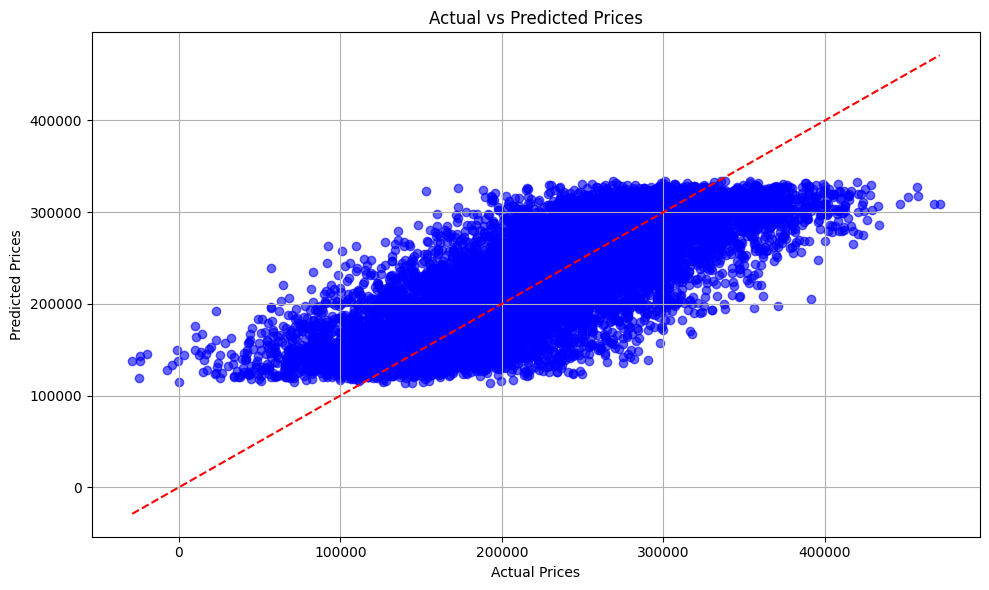

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_sc, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.tight_layout()
plt.show()

In [43]:
print(regressor.coef_)
print(regressor.intercept_)

[57302.48273266  5637.52867883  2345.82034585  -277.7709192 ]
225048.3509797884


In [44]:
# %% Print regression equation
print("Regression Equation:")
equation = "y = {:.2f}".format(regressor.intercept_)
for i, coef in enumerate(regressor.coef_):
    equation += " + ({:.2f} * x{})".format(coef, i+1)
print(equation)

Regression Equation:
y = 225048.35 + (57302.48 * x1) + (5637.53 * x2) + (2345.82 * x3) + (-277.77 * x4)
